## G4Bench regression tests
Geant4 : v10.2 - v10.7

In [1]:
import pandas
import json
import os

In [2]:
data_dir = "./data"
cpu = "xeon_gold_6240"
version_list = os.listdir(data_dir)
version_list

['10.6.1', '10.2.3', '10.3.3', '10.4.3', '10.5.1', '10.6.2', '10.7.1']

In [3]:
ecal_df = pandas.DataFrame(columns = ['Version', 'Time', 'Init', 'TPE', 'EPS', 'SPS', 'Edep'])
hcal_df = pandas.DataFrame(columns = ['Version', 'Time', 'Init', 'TPE', 'EPS', 'SPS', 'Edep'])
vgeo_x18_df = pandas.DataFrame(columns = ['Version', 'Time', 'Init', 'TPE', 'EPS', 'SPS', 'Edep'])
vgeo_e20_df = pandas.DataFrame(columns = ['Version', 'Time', 'Init', 'TPE', 'EPS', 'SPS', 'Edep'])

### ecal e1000 benchmark

In [4]:
idata = 0
cpu_name = ""
for ver in version_list:
    json_file = open(data_dir +"/" + ver + "/" + cpu + "/ecal.json", 'r')
    jobj = json.load(json_file)
    cpu_name = jobj['cpu']
    ecal_df.loc[idata] = [ver, jobj['time'], jobj['init'], jobj['tpe'], jobj['eps'], jobj['sps'],jobj['edep']]
    idata = idata + 1
cpu_name

'Intel(R) Xeon(R) Gold 6240 CPU @ 2.60GHz'

In [5]:
ecal_df_sorted = ecal_df.sort_values('Version')
ecal_df_sorted.reset_index(drop=True, inplace=True)
ecal_df_sorted

,Version,Time,Init,TPE,EPS,SPS,Edep
0,10.2.3,63.73,0.48,6.373,0.158103,673.665,968.705
1,10.3.3,67.28,0.62,6.728,0.150015,640.581,968.300
2,10.4.3,63.38,0.63,6.338,0.159363,689.946,968.378
3,10.5.1,63.83,0.58,6.383,0.158103,687.920,968.489
4,10.6.1,63.14,1.08,6.314,0.161134,701.752,968.220
5,10.6.2,63.44,1.16,6.344,0.160565,699.273,968.220
6,10.7.1,56.48,1.26,5.648,0.181094,787.391,967.048


In [6]:
import matplotlib.pyplot as plt

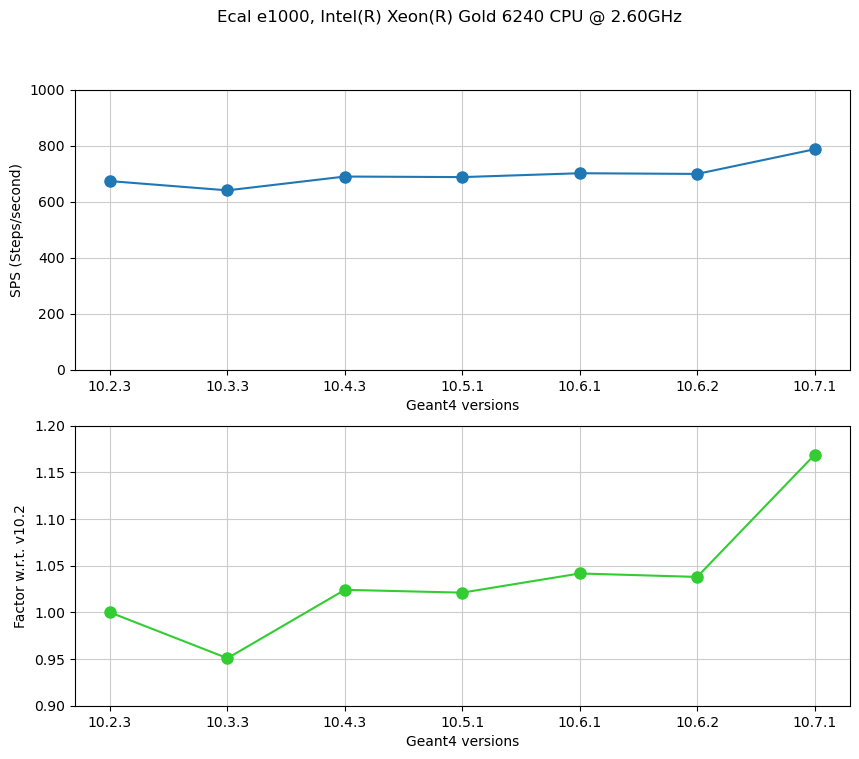

In [8]:
plt.rcdefaults()
fig, plot = plt.subplots(2, 1, figsize=(10,8))
fig.suptitle("Ecal e1000, " + cpu_name)

plot[0].set_xlabel("Geant4 versions")
plot[0].set_ylabel("SPS (Steps/second)")
plot[0].set_ylim([0,1000])
plot[0].grid(which="both", color="#cccccc")
plot[0].plot(ecal_df_sorted['Version'], ecal_df_sorted['SPS'], 'o-', markersize=8)

ref_val = ecal_df_sorted['SPS'][0]
plot[1].set_xlabel("Geant4 versions")
plot[1].set_ylabel("Factor w.r.t. v10.2")
plot[1].set_ylim([0.9,1.2])
plot[1].grid(which="both", color="#cccccc")
plot[1].plot(ecal_df_sorted['Version'], ecal_df_sorted['SPS']/ref_val, 'o-', markersize=8, color="limegreen")

plt.show()

### hcal p10 benchmark

In [9]:
idata = 0
for ver in version_list:
    json_file = open(data_dir +"/" + ver + "/" + cpu + "/hcal.json", 'r')
    jobj = json.load(json_file)
    cpu_name = jobj['cpu']
    hcal_df.loc[idata] = [ver, jobj['time'], jobj['init'], jobj['tpe'], jobj['eps'], jobj['sps'],jobj['edep']]
    idata = idata + 1

In [10]:
hcal_df_sorted = hcal_df.sort_values('Version')
hcal_df_sorted.reset_index(drop=True, inplace=True)
hcal_df_sorted

,Version,Time,Init,TPE,EPS,SPS,Edep
0,10.2.3,350.51,0.53,35.051,0.028573,433.809,836.809
1,10.3.3,333.06,0.63,33.306,0.030082,450.768,838.646
2,10.4.3,348.56,0.59,34.856,0.028738,434.834,838.965
3,10.5.1,368.98,0.58,36.898,0.027144,418.925,832.130
4,10.6.1,356.04,0.95,35.604,0.028162,427.646,836.605
5,10.6.2,416.67,0.95,41.667,0.024055,366.503,841.820
6,10.7.1,323.32,1.30,32.332,0.031054,477.082,844.723


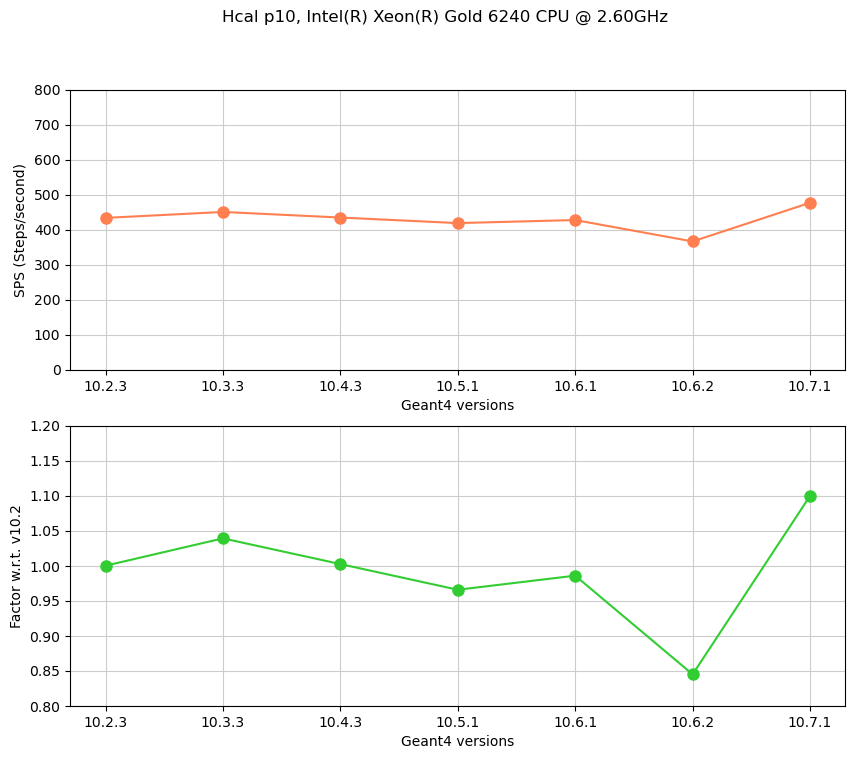

In [13]:
plt.rcdefaults()
fig, plot = plt.subplots(2, 1, figsize=(10,8))
fig.suptitle("Hcal p10, " + cpu_name)

plot[0].set_xlabel("Geant4 versions")
plot[0].set_ylabel("SPS (Steps/second)")
plot[0].set_ylim([0,800])
plot[0].grid(which="both", color="#cccccc")
plot[0].plot(hcal_df_sorted['Version'], hcal_df_sorted['SPS'], 'o-', markersize=8, color="coral")

ref_val = hcal_df_sorted['SPS'][0]
plot[1].set_xlabel("Geant4 versions")
plot[1].set_ylabel("Factor w.r.t. v10.2")
plot[1].set_ylim([0.8,1.2])
plot[1].grid(which="both", color="#cccccc")
plot[1].plot(hcal_df_sorted['Version'], hcal_df_sorted['SPS']/ref_val, 'o-', markersize=8, color="limegreen")

plt.show()

### vgeo x18 benchmark

In [14]:
idata = 0
for ver in version_list:
    json_file = open(data_dir +"/" + ver + "/" + cpu + "/vgeo_x18.json", 'r')
    jobj = json.load(json_file)
    cpu_name = jobj['cpu']
    vgeo_x18_df.loc[idata] = [ver, jobj['time'], jobj['init'], jobj['tpe'], jobj['eps'], jobj['sps'],jobj['edep']]
    idata = idata + 1

In [15]:
vgeo_x18_df_sorted = vgeo_x18_df.sort_values('Version')
vgeo_x18_df_sorted.reset_index(drop=True, inplace=True)
vgeo_x18_df_sorted

,Version,Time,Init,TPE,EPS,SPS,Edep
0,10.2.3,21.56,0.49,0.2156,4.74608,982.028,1.90512
1,10.3.3,20.27,0.60,0.2027,5.08388,1049.030,1.90888
2,10.4.3,21.43,0.65,0.2143,4.81232,995.203,1.92136
3,10.5.1,20.12,0.55,0.2012,5.10986,1056.510,1.89579
4,10.6.1,20.18,0.70,0.2018,5.13347,1059.030,1.87969
5,10.6.2,20.90,0.69,0.2090,4.94805,1020.780,1.87969
6,10.7.1,19.02,0.48,0.1902,5.39374,1113.890,1.91229


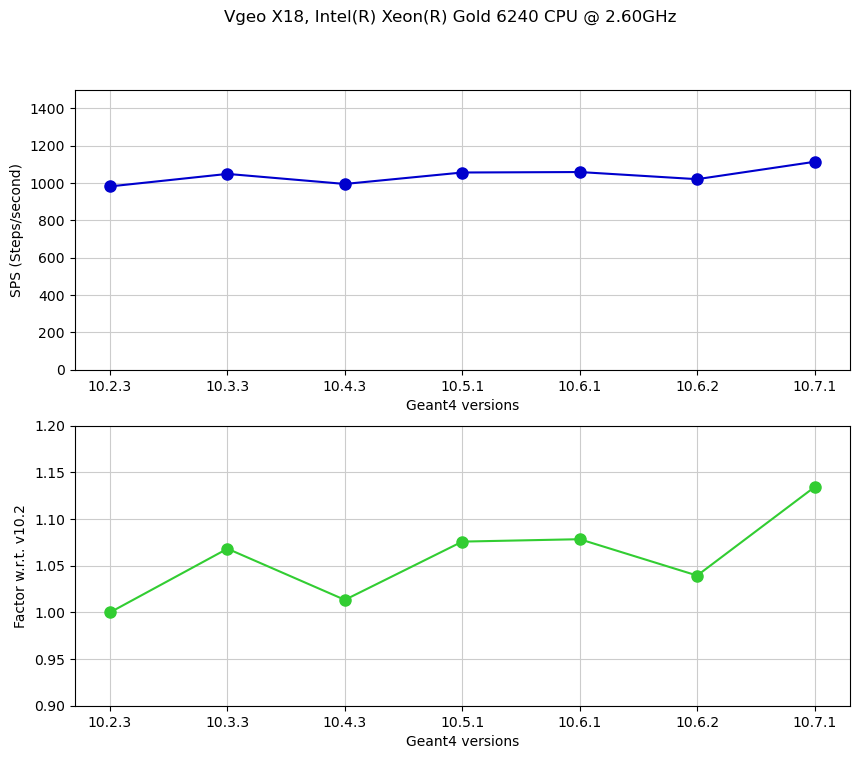

In [17]:
plt.rcdefaults()
fig, plot = plt.subplots(2, 1, figsize=(10,8))
fig.suptitle("Vgeo X18, " + cpu_name)

plot[0].set_xlabel("Geant4 versions")
plot[0].set_ylabel("SPS (Steps/second)")
plot[0].set_ylim([0,1500])
plot[0].grid(which="both", color="#cccccc")
plot[0].plot(vgeo_x18_df_sorted['Version'], vgeo_x18_df_sorted['SPS'], 'o-', markersize=8, color="mediumblue")

ref_val = vgeo_x18_df_sorted['SPS'][0]
plot[1].set_xlabel("Geant4 versions")
plot[1].set_ylabel("Factor w.r.t. v10.2")
plot[1].set_ylim([0.9,1.2])
plot[1].grid(which="both", color="#cccccc")
plot[1].plot(vgeo_x18_df_sorted['Version'], vgeo_x18_df_sorted['SPS']/ref_val, 'o-', markersize=8, color="limegreen")

plt.show()

### vgeo e20 benchmark

In [18]:
idata = 0
for ver in version_list:
    json_file = open(data_dir +"/" + ver + "/" + cpu + "/vgeo_e20.json", 'r')
    jobj = json.load(json_file)
    cpu_name = jobj['cpu']
    vgeo_e20_df.loc[idata] = [ver, jobj['time'], jobj['init'], jobj['tpe'], jobj['eps'], jobj['sps'],jobj['edep']]
    idata = idata + 1

In [19]:
vgeo_e20_df_sorted = vgeo_e20_df.sort_values('Version')
vgeo_e20_df_sorted.reset_index(drop=True, inplace=True)
vgeo_e20_df_sorted

,Version,Time,Init,TPE,EPS,SPS,Edep
0,10.2.3,52.36,0.50,0.5236,1.92827,736.448,18.7655
1,10.3.3,49.61,0.60,0.4961,2.04040,782.254,18.7486
2,10.4.3,56.67,0.56,0.5667,1.78221,684.417,18.7574
3,10.5.1,53.02,0.56,0.5302,1.90621,734.924,18.7375
4,10.6.1,50.43,0.69,0.5043,2.01045,770.862,18.7549
5,10.6.2,52.06,0.71,0.5206,1.94742,746.693,18.7549
6,10.7.1,46.64,0.46,0.4664,2.16544,830.971,18.7446


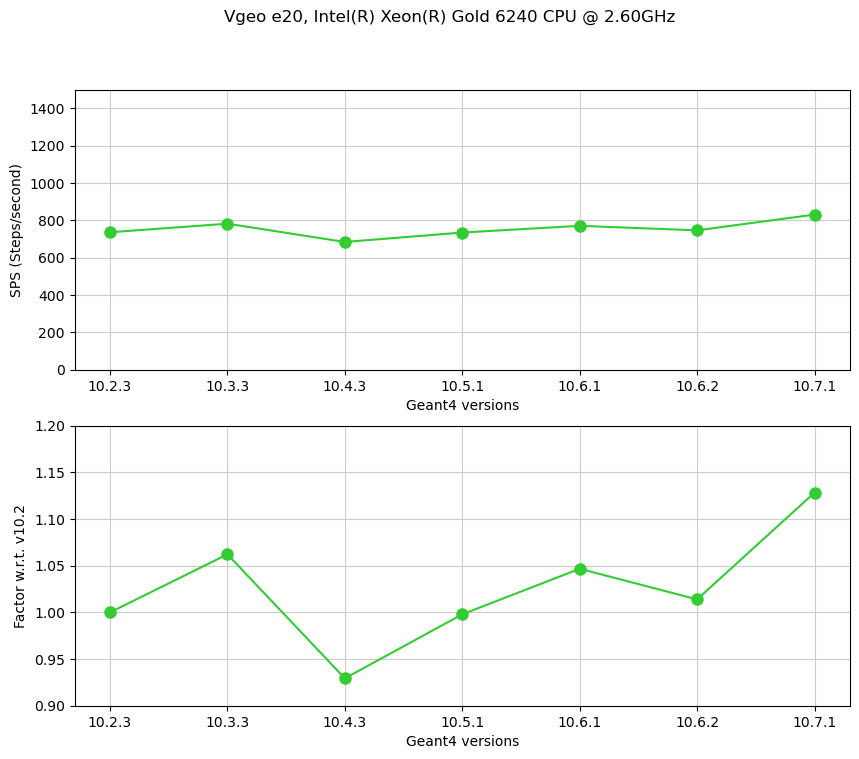

In [21]:
plt.rcdefaults()
fig, plot = plt.subplots(2, 1, figsize=(10,8))
fig.suptitle("Vgeo e20, " + cpu_name)

plot[0].set_xlabel("Geant4 versions")
plot[0].set_ylabel("SPS (Steps/second)")
plot[0].set_ylim([0,1500])
plot[0].grid(which="both", color="#cccccc")
plot[0].plot(vgeo_e20_df_sorted['Version'], vgeo_e20_df_sorted['SPS'], 'o-', markersize=8, color="limegreen")

ref_val = vgeo_e20_df_sorted['SPS'][0]
plot[1].set_xlabel("Geant4 versions")
plot[1].set_ylabel("Factor w.r.t. v10.2")
plot[1].set_ylim([0.9,1.2])
plot[1].grid(which="both", color="#cccccc")
plot[1].plot(vgeo_e20_df_sorted['Version'], vgeo_e20_df_sorted['SPS']/ref_val, 'o-', markersize=8, color="limegreen")

plt.show()